## Homework 3

### Подготовка

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=2) 

In [2]:
%matplotlib inline
plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 14})

In [3]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [13]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]],  # квалификация репетитора
              dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]) # поступил или нет ученик на специальность Математика
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [14]:
def calc_std_feat(x):
    new_x = []
    for feature in x:
        new_x.append((feature - feature.mean()) / feature.std())
    new_x = np.array(new_x)
    return new_x

In [15]:
X_st = X.copy().astype(np.float64)
X_st[1:] = calc_std_feat(X[1:])
X_st = X_st.T
X_st

array([[ 1.        , -0.57142857, -0.97958969, -0.89625816],
       [ 1.        , -0.57142857, -0.56713087, -0.89625816],
       [ 1.        , -0.21428571, -0.46401617,  0.38411064],
       [ 1.        , -0.57142857, -0.77336028, -0.89625816],
       [ 1.        ,  0.14285714,  0.97958969,  0.38411064],
       [ 1.        , -0.92857143, -0.36090146, -0.89625816],
       [ 1.        ,  0.85714286,  1.08270439,  1.66447944],
       [ 1.        ,  2.64285714,  2.11385144,  1.66447944],
       [ 1.        , -0.57142857, -1.08270439, -0.89625816],
       [ 1.        , -0.21428571,  0.05155735,  0.38411064]])

### 1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log (как вариант - использовать np.clip или np.where).

In [42]:
def calc_logloss(y, y_pred):
    y_pred_temp = np.clip(y_pred, 1e-10, 0.9999999)
    err = np.mean(- y * np.log(y_pred_temp) - (1.0 - y) * np.log(1.0 - y_pred_temp))
    return err

In [43]:
#check
y_pred_test = np.array([0, 0.1, 1, 1, 1, 0, 1, 0.01, 0.2, 0.9999])
calc_logloss(y, y_pred_test)

1.7843044720630452

### 2. Подберите аргументы функции eval_LR_model для логистической регрессии таким образом, чтобы log loss был минимальным (оптимально здесь использовать критерий остановки обучения).

In [100]:
def eval_LR_model(X, y, alpha=1e-3, delta_err=1e-6):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    err, curr_delta = 10, 1
    errors_list, idx_list = [], []
    i = 0
    while curr_delta > delta_err:
        i += 1
        z = np.dot(X, w) # log(p/(1-p))
        y_pred = sigmoid(z) # p [0, 1]
        prev_err = err
        err = calc_logloss(y, y_pred)
        errors_list.append(err)
        idx_list.append(i)
        curr_delta = np.abs(prev_err - err)
        w -= alpha * (1/n * np.dot(X.T, (y_pred - y)))
    errors_list = np.array(errors_list)
    idx_list = np.array(idx_list)
    return w, errors_list, idx_list

In [103]:
w, errors_list, idx_list = eval_LR_model(X_st, y, alpha=1e-2, delta_err=1e-5) 
print(f'Final weights: {w}.\nFinal logloss: {errors_list[-1]}.\nFinal iteration: {idx_list[-1]}')

Final weights: [ 0.22322901 -2.33314778 -0.81934289  3.73020567].
Final logloss: 0.3379492576690167.
Final iteration: 6193


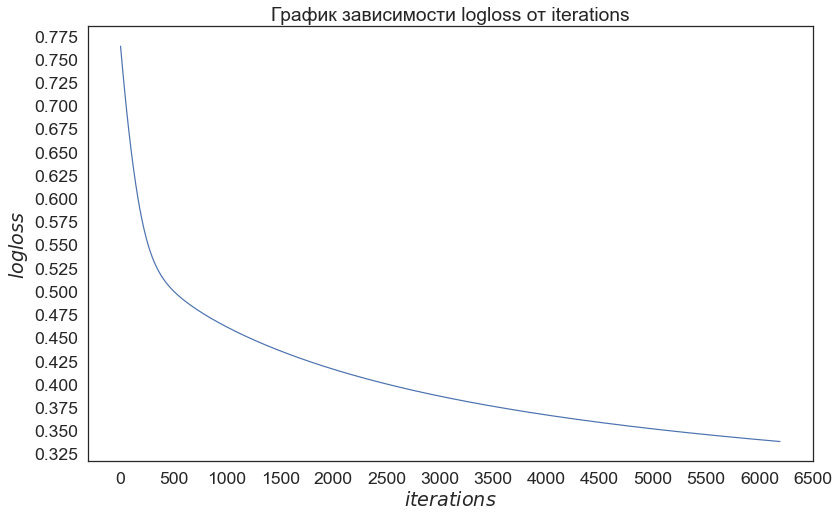

In [113]:
# Ошибка
plt.figure(figsize=(13, 8))
plt.title('График зависимости logloss от iterations')
plt.xlabel(r'$iterations$')
plt.ylabel(r'$logloss$')
plt.xticks(np.arange(0, 7000, 500))
plt.yticks(np.arange(0.1, 1, 0.025))

plt.plot(idx_list, errors_list)
plt.show()

### 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются значения признаков Х и веса, которые уже посчитаны функцией eval_LR_model, на выходе - массив y_pred_proba).

In [121]:
def calc_pred_proba(X, w):
    return sigmoid(np.dot(X, w))

calc_pred_proba(X_st, w)

array([0.27206889, 0.21046973, 0.9266402 , 0.23991899, 0.62717443,
       0.34123357, 0.97194501, 0.18754133, 0.28911938, 0.89223319])

### 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются значения признаков Х и веса, которые уже посчитаны функцией eval_LR_model, на выходе - массив y_pred).

In [123]:
def calc_pred(X, w, threshold=0.5):
    A = sigmoid(np.dot(X, w))
    A[A >= threshold] = 1
    A[A < threshold] = 0
    return A

calc_pred(X_st, w, threshold=0.65)

array([0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])

### 5. Посчитайте accuracy, матрицу ошибок, precision и recall, а также F1-score.

In [132]:
def accuracy(y, y_pred):
    return sum(y_pred == y)/y.shape[0]

In [144]:
def conf_matrix(y, y_pred):
    tp = sum(y[y==1] == y_pred[y==1])
    fp = sum(y[y==0] != y_pred[y==0])
    tn = sum(y[y==0] == y_pred[y==0])
    fn = sum(y[y==1] != y_pred[y==1])
    return np.array([[tp, fp], [tn, fn]])

In [146]:
def precision(conf_matrix):
    return conf_matrix[0][0]/(conf_matrix[0][0] + conf_matrix[0][1])

In [147]:
def recall(conf_matrix):
    return conf_matrix[0][0]/(conf_matrix[0][0] + conf_matrix[1][1])

In [156]:
def f_score(precision, recall, beta=1):
    return (1 + beta ** 2) * (precision * recall) / (beta ** 2 * precision + recall)

In [125]:
y_pred = calc_pred(X_st, w)
y_pred

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 1.])

In [133]:
y

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [134]:
accuracy(y, y_pred)

0.9

In [150]:
conf_matr = conf_matrix(y, y_pred)
conf_matr

array([[4, 0],
       [5, 1]])

In [153]:
pr = precision(conf_matr)
pr

1.0

In [154]:
rec = recall(conf_matr)
rec

0.8

In [157]:
f_score(pr, rec)

0.888888888888889

### 6. Могла ли модель переобучиться? Почему?

Теоретически могла, т.к. при обучении ставилась цель максимального уменьшения ошибки, что возможно, когда модель идеально предсказывает результат по обучающей выборке, которая, к тому же, достаточно мала. Также не применялась регуляризация для снижения непропорционально больших весов (хотя в итоговой модели таких весов нет).

Для более конкретного ответа требовалось бы разделить изначальную выборку на обучающую и тестовую и сравнить предсказаний на них. Если ошибки близки и невелики, то переобучения нет, если ошибки большие, то модель недообучилась, если ошибка на обучающей выборке мала, а на тестовой существенно больше, то мы имеем дело с переобучением.

### 7. (*) Создайте функции eval_LR_model_l1 и eval_LR_model_l2 с применением L1 и L2 регуляризации соответственно.

In [209]:
def eval_LR_model_l1(X, y, alpha=1e-3, lambda_=1e-2, delta_err=1e-6):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    err, curr_delta = 10, 1
    errors_list, idx_list = [], []
    i = 0
    while curr_delta > delta_err:
        i += 1
        z = np.dot(X, w) # log(p/(1-p))
        y_pred = sigmoid(z) # p [0, 1]
        prev_err = err
        err = calc_logloss(y, y_pred)
        errors_list.append(err)
        idx_list.append(i)
        curr_delta = np.abs(prev_err - err)
        w -= alpha * (1/n * np.dot(X.T, (y_pred - y)) + lambda_ * np.sign(w))
    errors_list = np.array(errors_list)
    idx_list = np.array(idx_list)
    return w, errors_list, idx_list

In [210]:
def eval_LR_model_l2(X, y, alpha=1e-3, lambda_=1e-2, delta_err=1e-6):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    err, curr_delta = 10, 1
    errors_list, idx_list = [], []
    i = 0
    while curr_delta > delta_err:
        i += 1
        z = np.dot(X, w) # log(p/(1-p))
        y_pred = sigmoid(z) # p [0, 1]
        prev_err = err
        err = calc_logloss(y, y_pred)
        errors_list.append(err)
        idx_list.append(i)
        curr_delta = np.abs(prev_err - err)
        w -= alpha * (1/n * np.dot(X.T, (y_pred - y)) + lambda_ * w)
    errors_list = np.array(errors_list)
    idx_list = np.array(idx_list)
    return w, errors_list, idx_list

In [211]:
# L1-reg, lambda = 1e-4
w, errors_list, idx_list = eval_LR_model_l1(X_st, y, lambda_ = 1e-4, alpha=1e-2, delta_err=1e-5) 
print(f'Final weights: {w}.\nFinal logloss: {errors_list[-1]}.\nFinal iteration: {idx_list[-1]}')

Final weights: [ 0.22164927 -2.32990887 -0.81612794  3.72325097].
Final logloss: 0.3382163556160539.
Final iteration: 6188


In [212]:
# L1-reg, lambda = 1e-3
w, errors_list, idx_list = eval_LR_model_l1(X_st, y, lambda_ = 1e-3, alpha=1e-2, delta_err=1e-5) 
print(f'Final weights: {w}.\nFinal logloss: {errors_list[-1]}.\nFinal iteration: {idx_list[-1]}')

Final weights: [ 0.20751705 -2.30058586 -0.7871263   3.66043272].
Final logloss: 0.34066329884954394.
Final iteration: 6140


In [213]:
# L1-reg, lambda = 1e-2
w, errors_list, idx_list = eval_LR_model_l1(X_st, y, lambda_ = 1e-2, alpha=1e-2, delta_err=1e-5) 
print(f'Final weights: {w}.\nFinal logloss: {errors_list[-1]}.\nFinal iteration: {idx_list[-1]}')

Final weights: [ 0.08460856 -2.02471193 -0.51867801  3.0788079 ].
Final logloss: 0.36669963009465184.
Final iteration: 5631


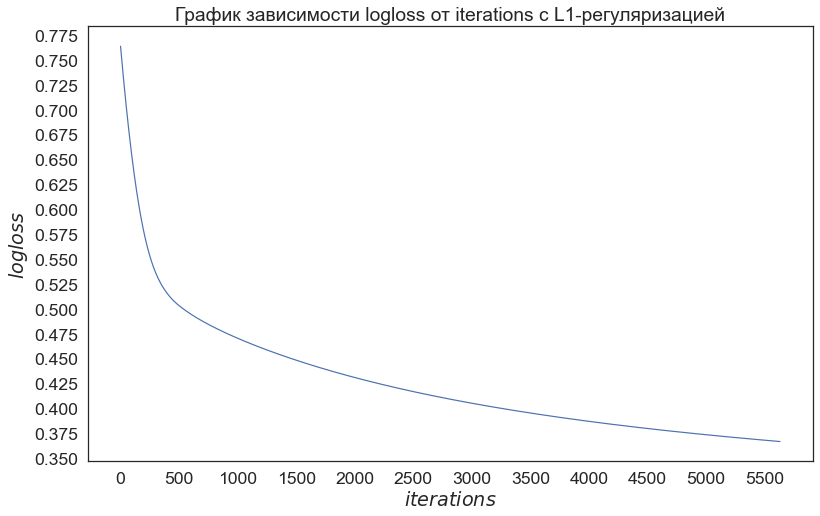

In [214]:
# L1-reg ошибка
plt.figure(figsize=(13, 8))
plt.title('График зависимости logloss от iterations с L1-регуляризацией')
plt.xlabel(r'$iterations$')
plt.ylabel(r'$logloss$')
plt.xticks(np.arange(0, 7000, 500))
plt.yticks(np.arange(0.1, 1, 0.025))

plt.plot(idx_list, errors_list)
plt.show()

In [215]:
# L2-reg
w, errors_list, idx_list = eval_LR_model_l2(X_st, y, lambda_=1e-4, alpha=1e-2, delta_err=1e-5) 
print(f'Final weights: {w}.\nFinal logloss: {errors_list[-1]}.\nFinal iteration: {idx_list[-1]}')

Final weights: [ 0.22073693 -2.32299842 -0.81394514  3.71300779].
Final logloss: 0.3386072370594039.
Final iteration: 6170


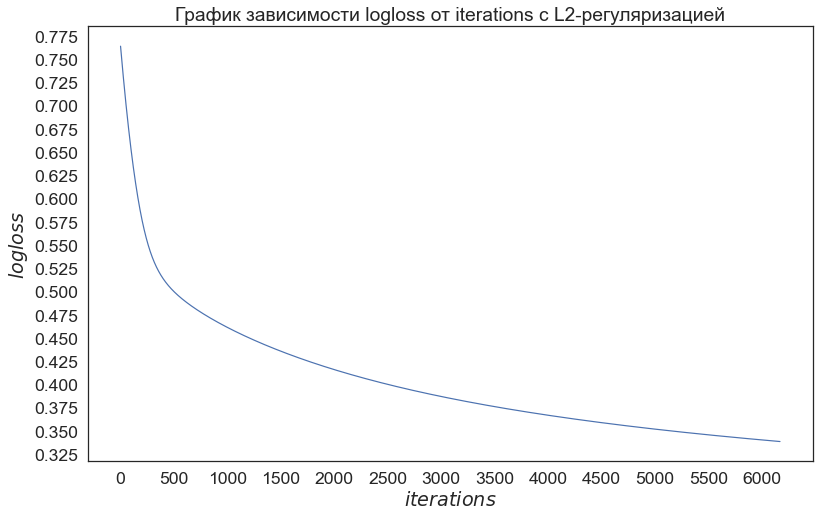

In [216]:
# L2-reg ошибка
plt.figure(figsize=(13, 8))
plt.title('График зависимости logloss от iterations с L2-регуляризацией')
plt.xlabel(r'$iterations$')
plt.ylabel(r'$logloss$')
plt.xticks(np.arange(0, 7000, 500))
plt.yticks(np.arange(0.1, 1, 0.025))

plt.plot(idx_list, errors_list)
plt.show()

При значениях $\lambda\leq1e-4$ регуляризация практически не влияет на итоговые веса и logloss относительно модели без регуляризации.